In [1]:
# TODO: add resampling, add filtering, CWT(continuous wavelet transform)
# TODO: record mic

# wight (gram)
# nothing: 0
# lemon: 41
# kiwi: 123
# orange1: 192
# orange2: 227

import scipy.fftpack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils import calc_fft_specfreq

gram = {'l0': 0,
        'l1': 41,
        'l2': 123,
        'l3': 192,
        'l4': 227}

def resampling_pandas(df, sampling_freq=20, higher_freq=100, max_gap_sec=1):
    ''' Resample unevenly spaced timeseries data linearly by 
    first upsampling to a high frequency (short_rate) 
    then downsampling to the desired rate.
    Parameters
    ----------
        df:               dataFrame
        sampling_freq:    sampling frequency
        max_gap_sec:      if gap larger than this, interpolation will be avoided
    
    Return
    ------
        result:           dataFrame
        
    Note: You will need these 3 lines before resampling_pandas() function
    ---------------------------------------------------------------------
        # df['date'] = pd.to_datetime(df['Time'],unit='ms')
        # df = df.set_index(['date'])
        # df.index = df.index.tz_localize('UTC').tz_convert(settings.TIMEZONE)
    '''
    
    # find where we have gap larger than max_gap_sec
    # print(df.index)
    # diff = np.diff(df.index)

    # print(diff)
    idx = np.where(np.greater(np.diff(df.index), 1000))[0]
    start = df.index[idx].tolist()
    stop = df.index[idx + 1].tolist()
    big_gaps = list(zip(start, stop))

    # upsample to higher frequency
    df = df.resample('{}ms'.format(1000/higher_freq)).mean().interpolate()

    # downsample to desired frequency
    df = df.resample('{}ms'.format(1000/sampling_freq)).ffill()

    # remove data inside the gaps
    for start, stop in big_gaps:
        df[start:stop] = None
    df.dropna(inplace=True)

    return df


def pca_sensor(df):
    pca = PCA(n_components=1)
    df[['acc_X_value', 'acc_Y_value', 'acc_Z_value']] -= df[['acc_X_value', 'acc_Y_value', 'acc_Z_value']].mean()
    df['acc_pca'] = pca.fit_transform( df[['acc_X_value', 'acc_Y_value', 'acc_Z_value']].to_numpy())
    return df


def calc_fft(y, T=1/100.0):
    N = len(y)
    yf = scipy.fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

    # fig, ax = plt.subplots()
    # ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    # plt.show()

    return xf, yf


def plt_raw_pca(t, acc):
    fig, ax1 = plt.subplots(nrows=1)
    ax1.plot(t, acc)
    # ax1.set_ylim(-0.2, 0.2)
    plt.show()


def plt_raw_xyz(t, x, y, z):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
    ax1.plot(t, x)
    ax1.set_ylim(-0.2, 0.2)
    ax2.plot(t, y)
    ax2.set_ylim(-0.2, 0.2)
    ax3.plot(t, z)
    ax3.set_ylim(9.6, 10)
    plt.show()


def plt_raw_spec(t, x, y, z, NFFT=128, Fs=100, noverlap=90):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6)
    ax1.plot(t, x)
    ax1.set_ylim(-0.2, 0.2)
    ax2.plot(t, y)
    ax2.set_ylim(-0.2, 0.2)
    ax3.plot(t, z)
    ax3.set_ylim(9.6, 10)
    Pxx, freqs, bins, im = ax4.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=noverlap)
    Pxx, freqs, bins, im = ax5.specgram(y, NFFT=NFFT, Fs=Fs, noverlap=noverlap)
    Pxx, freqs, bins, im = ax6.specgram(z, NFFT=NFFT, Fs=Fs, noverlap=noverlap)
    plt.show()


def nothing_pca():
    df = pd.read_csv('data/noobject-acc.csv')
    df = pca_sensor(df)
    df = df[(df['time_tick']<32) & (df['time_tick']>12)]
    t = df['time_tick'].values
    acc = df['acc_pca'].values
    return t, acc


def lemon_pca():
    df = pd.read_csv('data/lemon41gbound-acc.csv')
    df = pca_sensor(df)
    df = df[(df['time_tick']<90) & (df['time_tick']>70)]
    t = df['time_tick'].values
    acc = df['acc_pca'].values
    return t, acc


def kiwi_pca():
    df = pd.read_csv('data/kiwi123gbound-acc.csv')
    df = pca_sensor(df)
    df = df[(df['time_tick']<35) & (df['time_tick']>15)]
    t = df['time_tick'].values
    acc = df['acc_pca'].values
    return t, acc


def orange1_pca():
    df = pd.read_csv('data/orange192gbound-acc.csv')
    df = pca_sensor(df)
    df = df[(df['time_tick']<95) & (df['time_tick']>75)]
    t = df['time_tick'].values
    acc = df['acc_pca'].values
    return t, acc


def orange2_pca():
    df = pd.read_csv('data/orange227gbound-acc.csv')
    df = pca_sensor(df)
    df = df[(df['time_tick']<35) & (df['time_tick']>15)]
    t = df['time_tick'].values
    acc = df['acc_pca'].values
    return t, acc


def nothing():
    df = pd.read_csv('data/noobject-acc.csv')
    # print(df)
    df = df[(df['time_tick']<32) & (df['time_tick']>12)]
    t = df['time_tick'].values
    x = df['acc_X_value'].values
    y = df['acc_Y_value'].values
    z = df['acc_Z_value'].values
    return t, x, y, -z


def lemon():
    df = pd.read_csv('data/lemon41gbound-acc.csv')
    # print(df)
    df = df[(df['time_tick']<90) & (df['time_tick']>70)]
    t = df['time_tick'].values
    x = df['acc_X_value'].values
    y = df['acc_Y_value'].values
    z = df['acc_Z_value'].values
    return t, x, y, z


def kiwi():
    df = pd.read_csv('data/kiwi123gbound-acc.csv')
    # print(df)
    df = df[(df['time_tick']<35) & (df['time_tick']>15)]
    t = df['time_tick'].values
    x = df['acc_X_value'].values
    y = df['acc_Y_value'].values
    z = df['acc_Z_value'].values
    return t, x, y, z


def orange1():
    df = pd.read_csv('data/orange192gbound-acc.csv')
    # print(df)
    df = df[(df['time_tick']<95) & (df['time_tick']>75)]
    t = df['time_tick'].values
    x = df['acc_X_value'].values
    y = df['acc_Y_value'].values
    z = df['acc_Z_value'].values
    return t, x, y, z


def orange2():
    df = pd.read_csv('data/orange227gbound-acc.csv')
    # print(df)
    df = df[(df['time_tick']<35) & (df['time_tick']>15)]
    t = df['time_tick'].values
    x = df['acc_X_value'].values
    y = df['acc_Y_value'].values
    z = df['acc_Z_value'].values
    return t, x, y, z


def compare_raw_intensity():
    t, x, y, z = nothing()
    l0 = y
    l0 = l0 - np.mean(l0)

    t, x, y, z = lemon()
    l1 = y
    l1 = l1 - np.mean(l1)

    t, x, y, z = kiwi()
    l2 = y
    l2 = l2 - np.mean(l2)

    t, x, y, z = orange1()
    l3 = y
    l3 = l3 - np.mean(l3)

    t, x, y, z = orange2()
    l4 = y
    l4 = l4 - np.mean(l4)

    L = min(len(l0), min(len(l1), min(len(l2), min(len(l3), len(l4)))))
    t = t[:L]
    l0 = l0[:L]
    l1 = l1[:L]
    l2 = l2[:L]
    l3 = l3[:L]
    l4 = l4[:L]

    orig_I = np.mean(np.abs(l0))

    # Trial 1 not succeed
    # print("{0:.6f}".format((orig_I - np.mean(np.abs(l0)))/gram['l0']))
    # print("{0:.6f}".format((orig_I - np.mean(np.abs(l1)))/gram['l1']))
    # print("{0:.6f}".format((orig_I - np.mean(np.abs(l2)))/gram['l2']))
    # print("{0:.6f}".format((orig_I - np.mean(np.abs(l3)))/gram['l3']))
    # print("{0:.6f}".format((orig_I - np.mean(np.abs(l4)))/gram['l4']))

    # Trial 2, as shown in slide    
    print("{0:.6f}".format((np.mean(np.abs(l0)))*gram['l0']))
    print("{0:.6f}".format((np.mean(np.abs(l1)))*gram['l1']))
    print("{0:.6f}".format((np.mean(np.abs(l2)))*gram['l2']))
    print("{0:.6f}".format((np.mean(np.abs(l3)))*gram['l3']))
    print("{0:.6f}".format((np.mean(np.abs(l4)))*gram['l4']))

    fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5)
    ax0.plot(t, l0)
    ax0.set_ylim(-.15, .15)
    ax1.plot(t, l1)
    ax1.set_ylim(-.15, .15)
    ax2.plot(t, l2)
    ax2.set_ylim(-.15, .15)
    ax3.plot(t, l3)
    ax3.set_ylim(-.15, .15)
    ax4.plot(t, l4)
    ax4.set_ylim(-.15, .15)
    plt.show()


def compare_pca_raw():
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
    t, acc = nothing_pca()
    acc = acc - np.mean(acc)
    ax1.plot(t, acc)
    ax1.set_ylim(-0.1, 0.1)

    t, acc = lemon_pca()
    acc = acc - np.mean(acc)
    ax2.plot(t, acc)
    ax2.set_ylim(-0.1, 0.1)
    
    t, acc = kiwi_pca()
    acc = acc - np.mean(acc)
    ax3.plot(t, acc)
    ax3.set_ylim(-0.1, 0.1)
    
    t, acc = orange1_pca()
    acc = acc - np.mean(acc)
    ax4.plot(t, acc)
    ax4.set_ylim(-0.1, 0.1)
    
    t, acc = orange2_pca()
    acc = acc - np.mean(acc)
    ax5.plot(t, acc)
    ax5.set_ylim(-0.1, 0.1)

    plt.show()


def compare_pca_spec(NFFT=128, Fs=100, noverlap=90):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
    t, acc = nothing_pca()
    acc = acc - np.mean(acc)
    Pxx, freqs, bins, im = ax1.specgram(acc, NFFT=NFFT, Fs=Fs, noverlap=noverlap)

    t, acc = lemon_pca()
    acc = acc - np.mean(acc)
    Pxx, freqs, bins, im = ax2.specgram(acc, NFFT=NFFT, Fs=Fs, noverlap=noverlap)
    
    t, acc = kiwi_pca()
    acc = acc - np.mean(acc)
    Pxx, freqs, bins, im = ax3.specgram(acc, NFFT=NFFT, Fs=Fs, noverlap=noverlap)
    
    t, acc = orange1_pca()
    acc = acc - np.mean(acc)
    Pxx, freqs, bins, im = ax4.specgram(acc, NFFT=NFFT, Fs=Fs, noverlap=noverlap)
    
    t, acc = orange2_pca()
    acc = acc - np.mean(acc)
    Pxx, freqs, bins, im = ax5.specgram(acc, NFFT=NFFT, Fs=Fs, noverlap=noverlap)

    plt.show()



def compare_pca_fft(T=1/100.0):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)

    t, acc = nothing_pca()
    acc = acc[:int(len(acc)/2)]
    acc = acc - np.mean(acc)
    xf, yf = calc_fft(acc)
    ax1.plot(xf, 2.0/len(acc) * np.abs(yf[:len(acc)//2]))
    ax1.set_ylim(0, 0.01)

    t, acc = lemon_pca()
    acc = acc[:int(len(acc)/2)]
    acc = acc - np.mean(acc)
    xf, yf = calc_fft(acc)
    ax2.plot(xf, 2.0/len(acc) * np.abs(yf[:len(acc)//2]))
    ax2.set_ylim(0, 0.01)

    t, acc = kiwi_pca()
    acc = acc[:int(len(acc)/2)]
    acc = acc - np.mean(acc)
    xf, yf = calc_fft(acc)
    ax3.plot(xf, 2.0/len(acc) * np.abs(yf[:len(acc)//2]))
    ax3.set_ylim(0, 0.01)

    t, acc = orange1_pca()
    acc = acc[:int(len(acc)/2)]
    acc = acc - np.mean(acc)
    xf, yf = calc_fft(acc)
    ax4.plot(xf, 2.0/len(acc) * np.abs(yf[:len(acc)//2]))
    ax4.set_ylim(0, 0.01)

    t, acc = orange2_pca()
    acc = acc[:int(len(acc)/2)]
    acc = acc - np.mean(acc)
    xf, yf = calc_fft(acc)
    ax5.plot(xf, 2.0/len(acc) * np.abs(yf[:len(acc)//2]))
    ax5.set_ylim(0, 0.01)

    plt.show()


def specgram_eg():
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    dt = 0.0005
    t = np.arange(0.0, 20.0, dt)
    s1 = np.sin(2 * np.pi * 100 * t)
    s2 = 2 * np.sin(2 * np.pi * 400 * t)

    # create a transient "chirp"
    s2[t <= 10] = s2[12 <= t] = 0

    # add some noise into the mix
    nse = 0.01 * np.random.random(size=len(t))

    x = s1 + s2 + nse  # the signal
    NFFT = 1024  # the length of the windowing segments
    Fs = int(1.0 / dt)  # the sampling frequency

    fig, (ax1, ax2) = plt.subplots(nrows=2)
    ax1.plot(t, x)
    Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
    # The `specgram` method returns 4 objects. They are:
    # - Pxx: the periodogram
    # - freqs: the frequency vector
    # - bins: the centers of the time bins
    # - im: the matplotlib.image.AxesImage instance representing the data in the plot
    plt.show()

0.000000
1.447361
4.085503
4.620634
4.035082


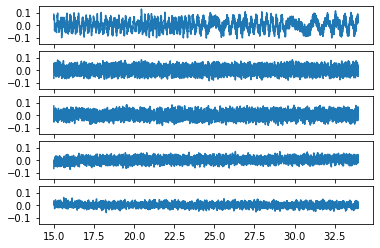

In [2]:
compare_raw_intensity()

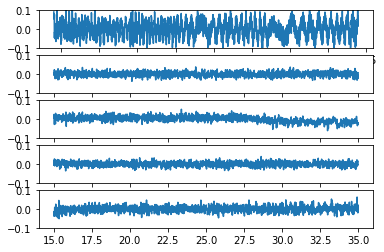

In [3]:
compare_pca_raw()

In [4]:
t, x, y, z = nothing()
l0 = y
l0 = l0 - np.mean(l0)

t, x, y, z = lemon()
l1 = y
l1 = l1 - np.mean(l1)

t, x, y, z = kiwi()
l2 = y
l2 = l2 - np.mean(l2)

t, x, y, z = orange1()
l3 = y
l3 = l3 - np.mean(l3)

t, x, y, z = orange2()
l4 = y
l4 = l4 - np.mean(l4)

In [5]:
L = min(len(l0), min(len(l1), min(len(l2), min(len(l3), len(l4)))))
t = t[:L]
l0 = l0[:L]
l1 = l1[:L]
l2 = l2[:L]
l3 = l3[:L]
l4 = l4[:L]

print(t)

[15.004875 15.014974 15.033538 ... 33.944731 33.954801 33.964308]


In [6]:
print((np.mean(np.abs(l0)))) # 0g
print((np.mean(np.abs(l1)))) # 41g
print((np.mean(np.abs(l2)))) # 123g
print((np.mean(np.abs(l3)))) # 192g
print((np.mean(np.abs(l4)))) # 227g

0.03815987980953423
0.035301482277152386
0.033215468818425756
0.024065804123474997
0.017775690205016095


In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

x_train = np.array([np.mean(np.abs(l0)), np.mean(np.abs(l1)), np.mean(np.abs(l3))]).reshape((-1, 1))
y_train = np.array([0, 41, 192])

model = LinearRegression().fit(x_train, y_train)

r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.999876132717198
intercept: 518.8441457887153
slope: [-13570.91043242]


In [8]:
x_test = np.array([np.mean(np.abs(l2)), np.mean(np.abs(l3)), np.mean(np.abs(l4))]).reshape((-1, 1))
y_pred = model.predict(x_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 68.07999348 192.24927354 277.61184614]
